In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)
import json
RANDOM_STATE = 42
kmeans_ks = list(range(5, 16))
dbscan_eps = [0.1, 0.2, 0.3, 0.4, 0.5]
dbscan_min_samples = [3, 4, 5]
agg_ks = list(range(2, 21))
agg_linkages = ["ward", "complete", "average"]

np.random.seed(RANDOM_STATE)
ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)

print("Artifacts dir:", ARTIFACTS_DIR.resolve())

Artifacts dir: C:\Users\Awesome\Desktop\MIREA\DPO\aie-student-template\homeworks\HW07\artifacts


In [2]:
path = "./data/"
file = "S07-hw-dataset-01.csv"
file2 = "S07-hw-dataset-02.csv"
file3 = "S07-hw-dataset-03.csv"
file4 = "S07-hw-dataset-04.csv"
data  = pd.read_csv(path + file, sep=',')
data

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213
...,...,...,...,...,...,...,...,...,...
11995,11995,15.358432,56.974156,-1.089617,-95.891749,8.909345,26.123207,-20.786813,-0.681086
11996,11996,-5.781842,71.198182,-0.201762,-54.336472,4.903560,-3.287724,-48.875539,0.172566
11997,11997,-7.573306,70.017900,-0.159869,17.167497,-3.809988,-5.356308,-98.751869,0.836130
11998,11998,13.856888,88.341387,-1.429989,-101.905925,10.759963,29.308895,-19.837802,0.300104


In [3]:
data.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [5]:
data.describe(include='all')

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [6]:
total = data.isna().sum()
share = total / len(data)
total

sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

In [7]:
share

sample_id    0.0
f01          0.0
f02          0.0
f03          0.0
f04          0.0
f05          0.0
f06          0.0
f07          0.0
f08          0.0
dtype: float64

In [8]:
data['sample_id'].value_counts(normalize=True)

sample_id
0        0.000083
1        0.000083
2        0.000083
3        0.000083
4        0.000083
           ...   
11995    0.000083
11996    0.000083
11997    0.000083
11998    0.000083
11999    0.000083
Name: proportion, Length: 12000, dtype: float64

In [9]:
X1 = data.drop(columns=['sample_id'])
y1 = data['sample_id']
X1

,f01,f02,f03,f04,f05,f06,f07,f08
0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213
...,...,...,...,...,...,...,...,...
11995,15.358432,56.974156,-1.089617,-95.891749,8.909345,26.123207,-20.786813,-0.681086
11996,-5.781842,71.198182,-0.201762,-54.336472,4.903560,-3.287724,-48.875539,0.172566
11997,-7.573306,70.017900,-0.159869,17.167497,-3.809988,-5.356308,-98.751869,0.836130
11998,13.856888,88.341387,-1.429989,-101.905925,10.759963,29.308895,-19.837802,0.300104


In [10]:
y1

0            0
1            1
2            2
3            3
4            4
         ...  
11995    11995
11996    11996
11997    11997
11998    11998
11999    11999
Name: sample_id, Length: 12000, dtype: int64

In [11]:
def plot_2d_points(X, labels=None, centers=None, title=None):
    # Рисует 2D-точки.
    # - X: массив формы (n_samples, 2)
    # - labels: метки кластеров (если есть)
    # - centers: центры кластеров (если есть)

    plt.figure(figsize=(7, 5))
    if labels is None:
        plt.scatter(X[:, 0], X[:, 1], s=25)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=25)

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=220, edgecolor="k")

    if title:
        plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True, alpha=0.25)
    plt.show()


def evaluate_k_range(X, k_values, scale=False, random_state=42):
    # Для заданных K считает:
    # - inertia_ (ниже лучше)
    # - silhouette_score (выше лучше; определён для K>=2)
    #
    # Возвращает словарь с массивами метрик.
    X_work = X
    if scale:
        scaler = StandardScaler()
        X_work = scaler.fit_transform(X_work)

    inertias = []
    silhouettes = []

    for k in k_values:
        model = KMeans(n_clusters=k, n_init=10, random_state=random_state)
        labels = model.fit_predict(X_work)

        inertias.append(model.inertia_)
        # silhouette определён только если кластеров >= 2 и есть хотя бы 2 разных кластера
        if k >= 2 and len(np.unique(labels)) > 1:
            silhouettes.append(silhouette_score(X_work, labels))
        else:
            silhouettes.append(np.nan)

    return {
        "k": np.array(list(k_values), dtype=int),
        "inertia": np.array(inertias, dtype=float),
        "silhouette": np.array(silhouettes, dtype=float),
        "scaled": bool(scale),
    }


def plot_k_metrics(metrics, title_suffix=""):
    k = metrics["k"]
    inertia = metrics["inertia"]
    sil = metrics["silhouette"]

    plt.figure(figsize=(7, 4))
    plt.plot(k, inertia, marker="o")
    plt.title(f"Inertia vs K{title_suffix}")
    plt.xlabel("K")
    plt.ylabel("inertia_ (ниже лучше)")
    plt.grid(True, alpha=0.25)
    plt.show()

    plt.figure(figsize=(7, 4))
    plt.plot(k, sil, marker="o")
    plt.title(f"Silhouette vs K{title_suffix}")
    plt.xlabel("K")
    plt.ylabel("silhouette (выше лучше)")
    plt.grid(True, alpha=0.25)
    plt.show()

     

In [12]:
def safe_cluster_metrics(X, labels):
    """Считает метрики; возвращает None, если метрика неприменима."""
    unique = np.unique(labels)
    # Нужно минимум 2 кластера
    if len(unique) < 2:
        return None

    # Нельзя, чтобы все точки были в одном кластере
    if len(unique) == 1:
        return None

    # silhouette требует, чтобы все кластеры имели >1 точки (часто, но не всегда)
    # В sklearn silhouette_score может падать, если какой-то кластер пуст/особый.
    try:
        sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None

    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None

    try:
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None

    return {"silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch}

def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    """PCA(2D) именно для визуализации."""
    p = PCA(n_components=2, random_state=RANDOM_STATE)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title, name_algo = "algo", n = 1):
    plt.figure(figsize=(7, 5))
    ##plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    unique = sorted(set(labels))
    for lab in unique:
        mask = labels == lab
        if lab == -1:
            plt.scatter(emb2d[mask, 0], emb2d[mask, 1], s=20, marker="x", label="noise (-1)")
        else:
            plt.scatter(emb2d[mask, 0], emb2d[mask, 1], s=20, label=f"cluster {lab}")
    plt.legend(loc="best")
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.savefig(f"artifacts/figures/{name_algo}_dataset{n}.png", dpi=300)
    plt.show()

def summarize_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist()))

def summarize_labels(labels):
    """Короткая статистика по разметке: число кластеров, доля шума."""
    labels = np.asarray(labels)
    n_noise = np.sum(labels == -1)
    n_points = len(labels)
    clusters = sorted([c for c in set(labels) if c != -1])
    return {
        "n_points": n_points,
        "n_clusters": len(clusters),
        "n_noise": int(n_noise),
        "noise_share": float(n_noise / n_points)
    }

In [13]:
data2  = pd.read_csv(path + file2, sep=',')
data2


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472
...,...,...,...,...
7995,7995,0.396444,-0.258826,1.866578
7996,7996,0.540757,-0.290802,5.437638
7997,7997,0.672079,0.675018,-2.488673
7998,7998,1.871350,0.290634,-0.852787


In [14]:
data2.head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [16]:
data2.describe(include='all')

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [17]:
total = data2.isna().sum()
share = total / len(data2)
total

sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64

In [18]:
share

sample_id    0.0
x1           0.0
x2           0.0
z_noise      0.0
dtype: float64

In [19]:
X2 = data2.drop(columns=['sample_id'])
y2 = data2['sample_id']

In [20]:
data3  = pd.read_csv(path + file3, sep=',')
data3


,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899
...,...,...,...,...,...
14995,14995,0.445659,-7.395811,1.128535,3.262734
14996,14996,0.258364,-6.267180,1.570404,1.735637
14997,14997,0.104631,-7.394277,0.428989,2.589123
14998,14998,-0.660232,-6.329977,1.420440,2.402324


In [21]:
data3.head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [22]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [23]:
data3.describe(include='all')

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [24]:
total = data3.isna().sum()
share = total / len(data3)
total

sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64

In [25]:
share

sample_id    0.0
x1           0.0
x2           0.0
f_corr       0.0
f_noise      0.0
dtype: float64

In [26]:
X3 = data3.drop(columns=['sample_id'])
y3 = data3['sample_id']

In [27]:
data4  = pd.read_csv(path + file4, sep=',')
data4

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,B,Y,-12.919119,-9.267355,47.395822,16.511540,-41.729247,7.799989,44.328290,...,-78.743409,-11.366750,36.477397,NaN,0.297751,1.243343,-1.600864,1.911969,NaN,0.670396
9996,9996,F,V,52.254641,-5.019958,0.993982,53.264712,-14.450314,36.732040,28.145815,...,-23.303770,17.161685,23.882319,-34.536261,1.294916,NaN,-7.103462,-3.585500,-1.395671,2.595430
9997,9997,E,U,33.523186,37.236276,-25.926850,2.988096,19.835512,13.452346,-10.263819,...,16.698474,16.473067,-16.313042,16.091088,0.112241,2.087142,-0.415373,-2.160709,2.007264,-1.058989
9998,9998,C,Y,-14.673242,-11.949793,48.937510,13.509319,-39.930625,6.829405,37.074823,...,-75.828139,NaN,39.972907,-6.301002,3.193872,-3.664677,4.156100,2.483901,-0.709864,-3.844730


In [28]:
data4.head()

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676


In [29]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20  n18    

In [30]:
data4.describe(include='all')

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
count,10000.00000,10000,10000,9826.000000,9811.000000,9801.000000,9808.000000,9799.000000,9817.000000,9796.000000,...,9785.000000,9804.000000,9829.000000,9793.000000,9815.000000,9776.000000,9803.000000,9789.000000,9798.000000,9805.000000
unique,NaN,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1692,1682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4999.50000,NaN,NaN,17.348435,-2.057620,7.908302,14.269157,0.900590,5.832787,-0.840875,...,-12.716502,-0.506241,8.360226,0.026943,0.039297,-0.037155,0.028512,-0.030738,-0.018685,-0.030254
std,2886.89568,NaN,NaN,22.578551,19.043410,25.637807,18.815319,20.981294,13.221646,26.583849,...,37.290305,14.336833,17.754646,26.121335,3.009995,3.020813,3.028106,3.000090,3.014209,3.014573
min,0.00000,NaN,NaN,-22.437090,-37.546998,-38.136412,-23.374316,-45.914070,-20.650038,-60.297304,...,-89.640783,-35.102360,-25.014050,-49.423300,-11.225848,-14.446922,-10.840777,-11.679259,-11.437909,-11.491223
25%,2499.75000,NaN,NaN,-3.975438,-14.200552,-8.591513,-1.223379,-5.086756,-4.532057,-13.554720,...,-41.284671,-11.563652,-2.123576,-19.425213,-1.973213,-2.082235,-2.007628,-2.074500,-2.051778,-2.074396
50%,4999.50000,NaN,NaN,22.042807,-6.532183,0.350400,10.069142,2.413111,7.391953,-2.429024,...,-1.145681,2.491416,6.691365,-8.464171,0.037806,-0.033336,0.031588,-0.043127,-0.015441,-0.015903
75%,7499.25000,NaN,NaN,37.535647,2.092197,30.725630,29.807101,18.398883,13.033076,16.095731,...,18.916379,11.903004,14.939690,16.861978,2.048648,2.019027,2.056870,1.980217,2.013964,2.031215


In [31]:
total = data4.isna().sum()
share = total / len(data4)
total

sample_id      0
cat_a          0
cat_b          0
n01          174
n02          189
n03          199
n04          192
n05          201
n06          183
n07          204
n08          194
n09          195
n10          189
n11          204
n12          202
n13          197
n14          198
n15          186
n16          191
n17          212
n18          212
n19          187
n20          203
n21          215
n22          196
n23          171
n24          207
n25          185
n26          224
n27          197
n28          211
n29          202
n30          195
dtype: int64

In [32]:
share

sample_id    0.0000
cat_a        0.0000
cat_b        0.0000
n01          0.0174
n02          0.0189
n03          0.0199
n04          0.0192
n05          0.0201
n06          0.0183
n07          0.0204
n08          0.0194
n09          0.0195
n10          0.0189
n11          0.0204
n12          0.0202
n13          0.0197
n14          0.0198
n15          0.0186
n16          0.0191
n17          0.0212
n18          0.0212
n19          0.0187
n20          0.0203
n21          0.0215
n22          0.0196
n23          0.0171
n24          0.0207
n25          0.0185
n26          0.0224
n27          0.0197
n28          0.0211
n29          0.0202
n30          0.0195
dtype: float64

In [33]:
X4 = data4.drop(columns=['sample_id'])
y4 = data4['sample_id']

In [34]:
def preprocessing(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    num_pipe = Pipeline([
        ('Simpleimputer', SimpleImputer(strategy='median')),
        ('Standardscaler', StandardScaler())
    ])
    
    cat_pipe = Pipeline([
        ('Simpleimputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('OneHotencoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    return ColumnTransformer(
        transformers=[
            ('numeric', num_pipe, numeric_features),
            ('categorical', cat_pipe, categorical_features)
        ],
        remainder='drop'
    )
    
preprocessor1 = preprocessing(X1)
preprocessor2 = preprocessing(X2)
preprocessor3 = preprocessing(X3)
preprocessor4 = preprocessing(X4)

X1_processed = preprocessor1.fit_transform(X1)
X2_processed = preprocessor2.fit_transform(X2)
X3_processed = preprocessor3.fit_transform(X3)
X4_processed = preprocessor4.fit_transform(X4)


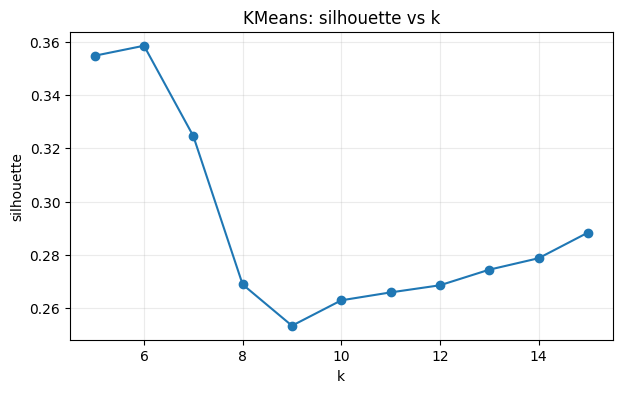

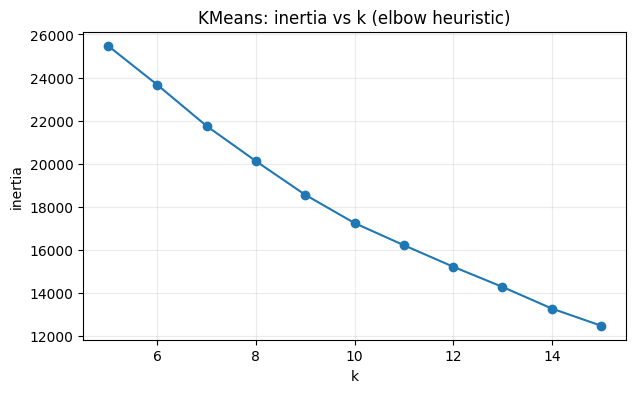

In [35]:
def eval_kmeans_grid(X_feat, ks):
    results = []
    for k in ks:
        model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        labels = model.fit_predict(X_feat)
        metrics = safe_cluster_metrics(X_feat, labels)

        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": labels,
            "metrics": metrics,
            "inertia": float(model.inertia_),
            "n_clusters": len(np.unique(labels)),
            "noise_frac": 0.0,
        })
    return results

kmeans_resultsX1 = eval_kmeans_grid(X1_processed, kmeans_ks)

def eval_graf(kmeans_res, n = 1):
    ks = [r["params"]["k"] for r in kmeans_res]
    sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_res]
    
    plt.figure(figsize=(7, 4))
    plt.plot(ks, sil, marker="o")
    plt.title("KMeans: silhouette vs k")
    plt.xlabel("k")
    plt.ylabel("silhouette")
    plt.grid(True, alpha=0.25)
    plt.savefig(f"artifacts/figures/kmeans_silhouette_dataset{n}.png", dpi=300)
    plt.show()
    
    # Инерция (elbow) – как эвристика
    inertia = [r["inertia"] for r in kmeans_res]
    plt.figure(figsize=(7, 4))
    plt.plot(ks, inertia, marker="o")
    plt.title("KMeans: inertia vs k (elbow heuristic)")
    plt.xlabel("k")
    plt.ylabel("inertia")
    plt.grid(True, alpha=0.25)
    plt.savefig(f"artifacts/figures/hmeans_inertia_dataset{n}.png", dpi=300)
    plt.show()

eval_graf(kmeans_resultsX1, 1)

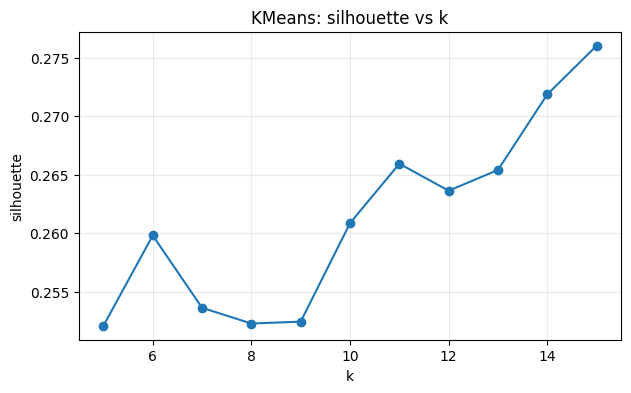

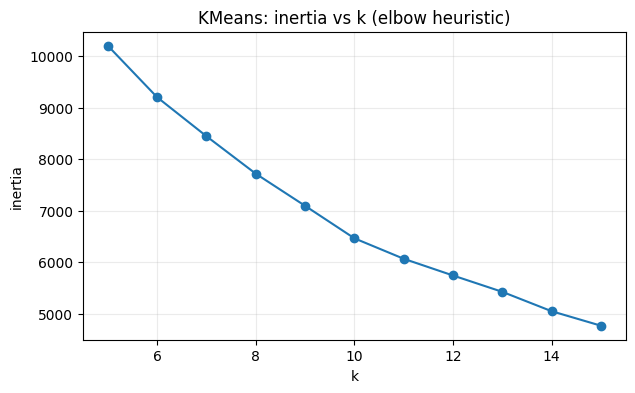

In [36]:
kmeans_resultsX2 = eval_kmeans_grid(X2_processed, kmeans_ks)
eval_graf(kmeans_resultsX2, 2)

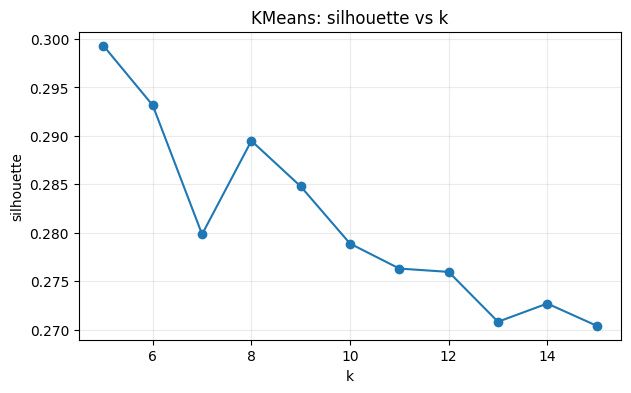

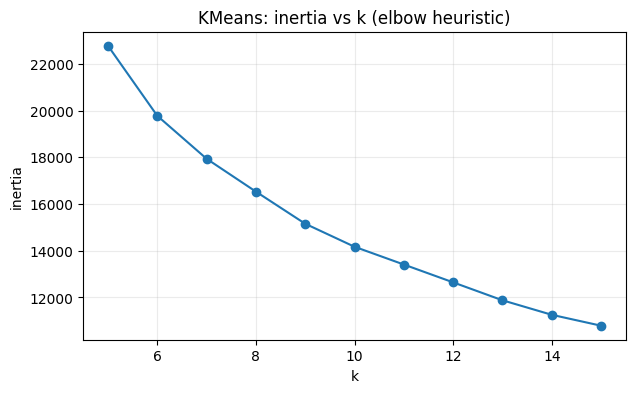

In [37]:
kmeans_resultsX3 = eval_kmeans_grid(X3_processed, kmeans_ks)
eval_graf(kmeans_resultsX3, 3)

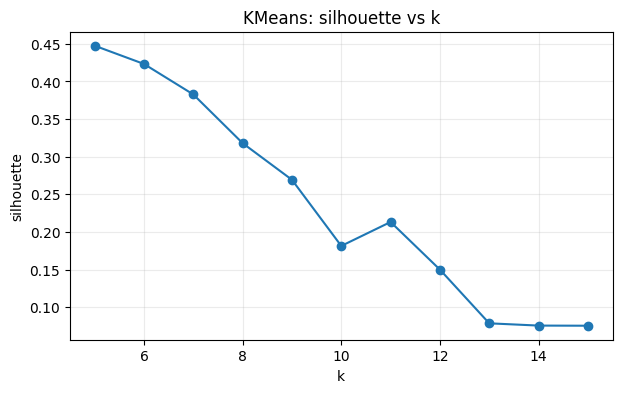

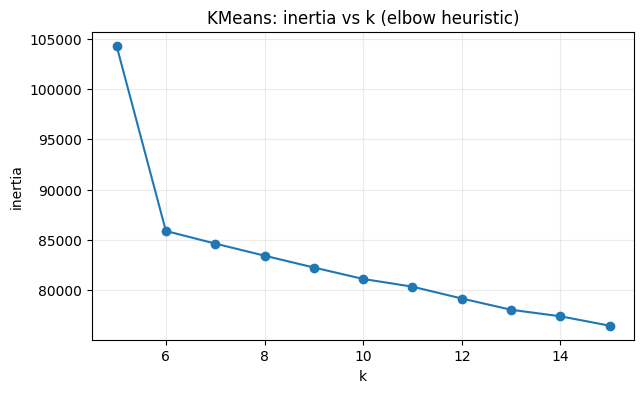

In [38]:
kmeans_resultsX4 = eval_kmeans_grid(X4_processed, kmeans_ks)
eval_graf(kmeans_resultsX4, 4)

In [39]:
def eval_dbscan_grid(X_feat, eps_list, min_samples_list):
    results = []
    n = len(X_feat)

    for eps in eps_list:
        for ms in min_samples_list:
            model = DBSCAN(eps=eps, min_samples=ms)
            labels = model.fit_predict(X_feat)

            noise_frac = float(np.mean(labels == -1))
            # Метрики по non-noise
            mask = labels != -1
            labels_nn = labels[mask]
            X_nn = X_feat[mask]

            # Перенумеруем метки non-noise, чтобы метрики работали корректнее (не обязательно, но аккуратно)
            if len(labels_nn) > 0:
                uniq = np.unique(labels_nn)
                mapping = {u: i for i, u in enumerate(uniq)}
                labels_nn = np.array([mapping[v] for v in labels_nn], dtype=int)

            metrics = None
            n_clusters = 0
            if len(X_nn) >= 10 and len(np.unique(labels_nn)) >= 2:
                metrics = safe_cluster_metrics(X_nn, labels_nn)
                n_clusters = len(np.unique(labels_nn))

            results.append({
                "algo": "dbscan",
                "params": {"eps": float(eps), "min_samples": int(ms)},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": int(n_clusters),
                "noise_frac": float(noise_frac),
                "n_non_noise": int(mask.sum()),
            })
    return results

dbscan_resultsX1 = eval_dbscan_grid(X1_processed, dbscan_eps, dbscan_min_samples)
len(dbscan_resultsX1)
dbscan_resultsX2 = eval_dbscan_grid(X2_processed, dbscan_eps, dbscan_min_samples)
len(dbscan_resultsX2)
dbscan_resultsX3 = eval_dbscan_grid(X3_processed, dbscan_eps, dbscan_min_samples)
len(dbscan_resultsX3)
dbscan_resultsX4 = eval_dbscan_grid(X4_processed, dbscan_eps, dbscan_min_samples)
len(dbscan_resultsX4)

15

In [40]:
def validation(dbscan_results):
    valid = [r for r in dbscan_results if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
    print("Valid DBSCAN configs:", len(valid))
    
    valid_sorted = sorted(valid, key=lambda r: r["metrics"]["silhouette"], reverse=True)
    for r in valid_sorted[:8]:
        print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])
    return valid_sorted

valid_sort1 = validation(dbscan_resultsX1)

dbscan_eps1 = np.arange(0.2, 1, 0.1)
dbscan_results2 = eval_dbscan_grid(X2_processed, dbscan_eps1, dbscan_min_samples)
valid_sort2 = validation(dbscan_results2)

dbscan_eps2 = np.arange(0.2, 1, 0.1)
dbscan_results3 = eval_dbscan_grid(X3_processed, dbscan_eps2, dbscan_min_samples)
valid_sort3 = validation(dbscan_results3)


valid_sort4 = validation(dbscan_resultsX4)

Valid DBSCAN configs: 12
{'eps': 0.5, 'min_samples': 5} sil= 0.283 noise= 0.034 clusters= 9
{'eps': 0.5, 'min_samples': 3} sil= 0.274 noise= 0.025 clusters= 10
{'eps': 0.5, 'min_samples': 4} sil= 0.272 noise= 0.028 clusters= 10
{'eps': 0.4, 'min_samples': 5} sil= 0.006 noise= 0.127 clusters= 25
{'eps': 0.4, 'min_samples': 4} sil= -0.02 noise= 0.107 clusters= 37
{'eps': 0.4, 'min_samples': 3} sil= -0.079 noise= 0.086 clusters= 62
{'eps': 0.3, 'min_samples': 5} sil= -0.122 noise= 0.433 clusters= 81
{'eps': 0.2, 'min_samples': 3} sil= -0.198 noise= 0.787 clusters= 223
Valid DBSCAN configs: 16
{'eps': 0.7000000000000002, 'min_samples': 3} sil= 0.346 noise= 0.007 clusters= 2
{'eps': 0.6000000000000001, 'min_samples': 4} sil= 0.156 noise= 0.016 clusters= 10
{'eps': 0.6000000000000001, 'min_samples': 5} sil= 0.138 noise= 0.023 clusters= 12
{'eps': 0.4000000000000001, 'min_samples': 5} sil= 0.135 noise= 0.062 clusters= 8
{'eps': 0.6000000000000001, 'min_samples': 3} sil= 0.104 noise= 0.013 clu

In [41]:
def pick_best_by_silhouette(results):
    best = None
    best_score = -np.inf
    for r in results:
        m = r["metrics"]
        if m is None:
            continue
        s = m["silhouette"]
        if s is None:
            continue
        if s > best_score:
            best_score = s
            best = r
    return best, best_score

def print_result_card(name, result):
    m = result["metrics"] or {}
    print("=" * 72)
    print(f"{name}")
    print("algo:", result["algo"])
    print("params:", result["params"])
    print("n_clusters:", result.get("n_clusters"))
    if result["algo"] == "dbscan":
        print("noise_frac:", round(result.get("noise_frac", 0.0), 3), " non-noise:", result.get("n_non_noise"))
    print("metrics:")
    print("  silhouette_score:", None if m.get("silhouette") is None else round(m["silhouette"], 3))
    print("  davies_bouldin_score:", None if m.get("davies_bouldin") is None else round(m["davies_bouldin"], 3))
    print("  calinski_harabasz_score:", None if m.get("calinski_harabasz") is None else round(m["calinski_harabasz"], 1))
    if result.get("inertia") is not None:
        print("  inertia:", round(result["inertia"], 1))


In [42]:
best_kmeans1, best_kmeans_s1 = pick_best_by_silhouette(kmeans_resultsX1)
best_kmeans1["params"], round(best_kmeans_s1, 3)

best_dbscan1 = valid_sort1[0] if valid_sort1 else None
best_dbscan1["params"] if best_dbscan1 else "No valid config found"

print_result_card("BEST KMEANS (by silhouette)", best_kmeans1)
if best_dbscan1 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan1)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 6}
n_clusters: 6
metrics:
  silhouette_score: 0.359
  davies_bouldin_score: 1.182
  calinski_harabasz_score: 7333.4
  inertia: 23662.2
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.5, 'min_samples': 5}
n_clusters: 9
noise_frac: 0.034  non-noise: 11596
metrics:
  silhouette_score: 0.283
  davies_bouldin_score: 0.947
  calinski_harabasz_score: 4301.2


In [43]:
best_kmeans2, best_kmeans_s2 = pick_best_by_silhouette(kmeans_resultsX2)
best_kmeans2["params"], round(best_kmeans_s2, 3)

best_dbscan2 = valid_sort2[0] if valid_sort2 else None
best_dbscan2["params"] if best_dbscan2 else "No valid config found"

print_result_card("BEST KMEANS (by silhouette)", best_kmeans2)
if best_dbscan2 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan2)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 15}
n_clusters: 15
metrics:
  silhouette_score: 0.276
  davies_bouldin_score: 0.966
  calinski_harabasz_score: 2300.3
  inertia: 4768.5
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.7000000000000002, 'min_samples': 3}
n_clusters: 2
noise_frac: 0.007  non-noise: 7943
metrics:
  silhouette_score: 0.346
  davies_bouldin_score: 0.551
  calinski_harabasz_score: 10.4


In [44]:
best_kmeans3, best_kmeans_s3 = pick_best_by_silhouette(kmeans_resultsX3)
best_kmeans3["params"], round(best_kmeans_s3, 3)

best_dbscan3 = valid_sort3[0] if valid_sort3 else None
best_dbscan3["params"] if best_dbscan3 else "No valid config found"


print_result_card("BEST KMEANS (by silhouette)", best_kmeans3)
if best_dbscan3 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan3)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 5}
n_clusters: 5
metrics:
  silhouette_score: 0.299
  davies_bouldin_score: 1.169
  calinski_harabasz_score: 6125.1
  inertia: 22779.9
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.8000000000000003, 'min_samples': 3}
n_clusters: 2
noise_frac: 0.001  non-noise: 14978
metrics:
  silhouette_score: 0.373
  davies_bouldin_score: 0.551
  calinski_harabasz_score: 17.2


In [45]:
best_kmeans4, best_kmeans_s4 = pick_best_by_silhouette(kmeans_resultsX4)
best_kmeans4["params"], round(best_kmeans_s4, 3)

best_dbscan4 = valid_sort4[0] if valid_sort4 else None
best_dbscan4["params"] if best_dbscan4 else "No valid config found"

print_result_card("BEST KMEANS (by silhouette)", best_kmeans4)
if best_dbscan4 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan4)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 5}
n_clusters: 5
metrics:
  silhouette_score: 0.447
  davies_bouldin_score: 0.976
  calinski_harabasz_score: 5087.7
  inertia: 104300.6


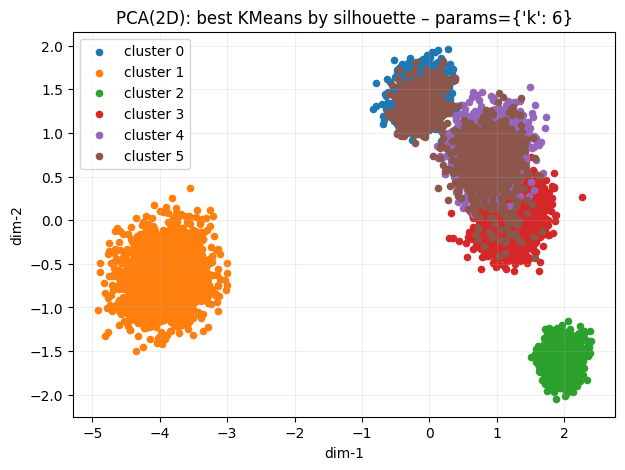

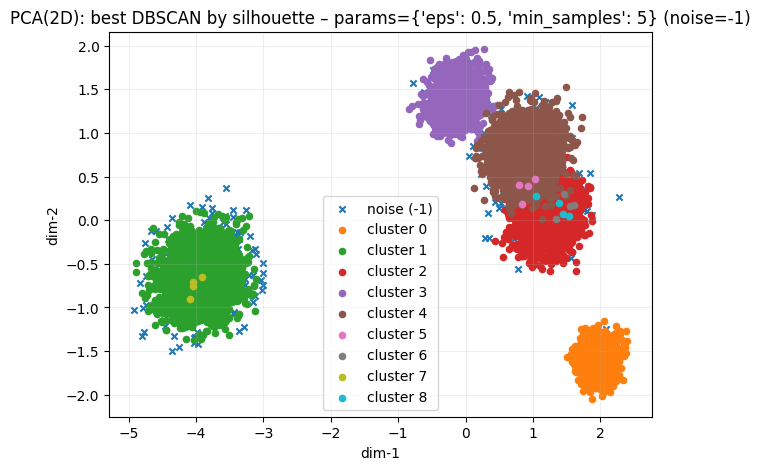

In [46]:
X_plot2d = pca_2d_for_plot(X1_processed, random_state=RANDOM_STATE)

plot_2d_embedding(
    X_plot2d, best_kmeans1["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans1['params']}",
    name_algo = "kmeans",
    n = 1
)

# DBSCAN best (if exists)
if best_dbscan1 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan1["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan1['params']} (noise=-1)",
        name_algo = "dbscan",
        n = 1
    )


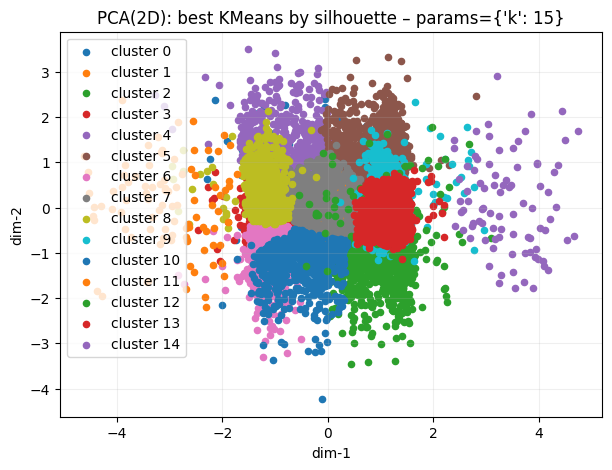

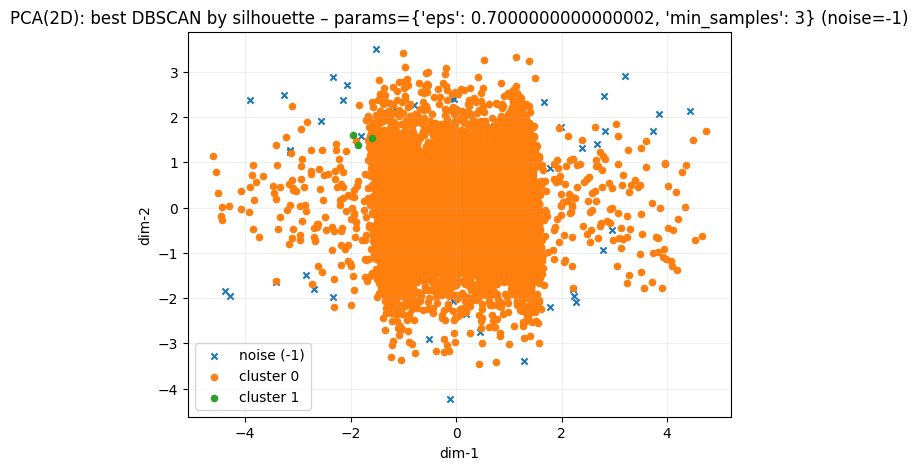

In [47]:
X_plot2d = pca_2d_for_plot(X2_processed, random_state=RANDOM_STATE)

plot_2d_embedding(
    X_plot2d, best_kmeans2["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans2['params']}",
    name_algo = "kmeans",
    n = 2
)

# DBSCAN best (if exists)
if best_dbscan2 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan2["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan2['params']} (noise=-1)",
        name_algo = "dbscan",
        n = 2
    )


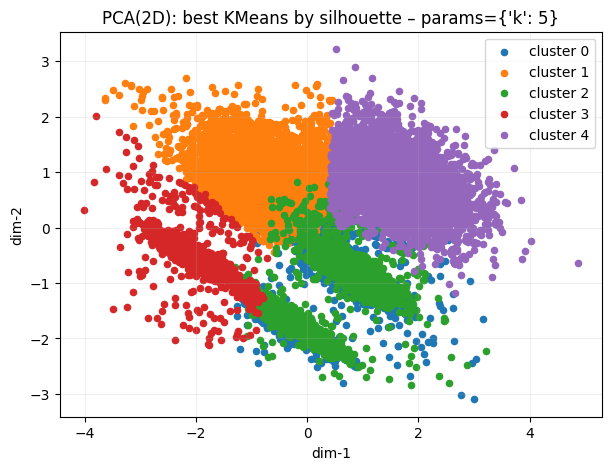

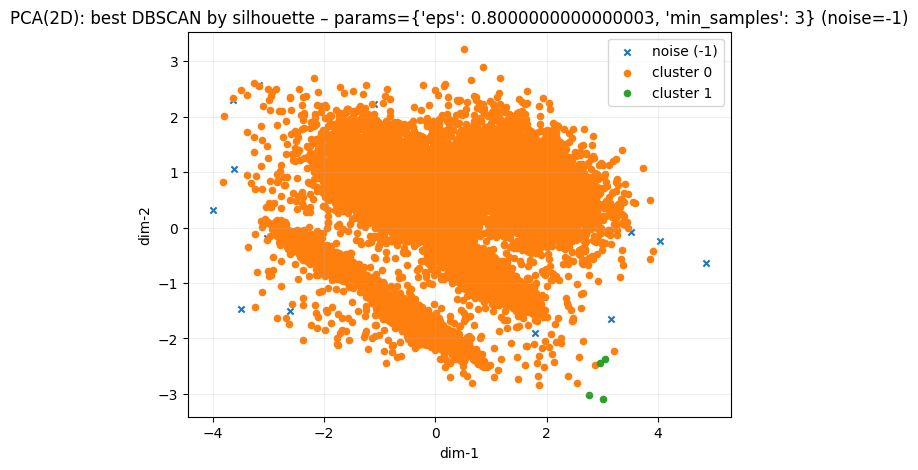

In [48]:
X_plot2d = pca_2d_for_plot(X3_processed, random_state=RANDOM_STATE)

plot_2d_embedding(
    X_plot2d, best_kmeans3["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans3['params']}",
    name_algo = "kmeans",
    n = 3
)

# DBSCAN best (if exists)
if best_dbscan3 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan3["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan3['params']} (noise=-1)",
        name_algo = "dbscan",
        n = 3
    )


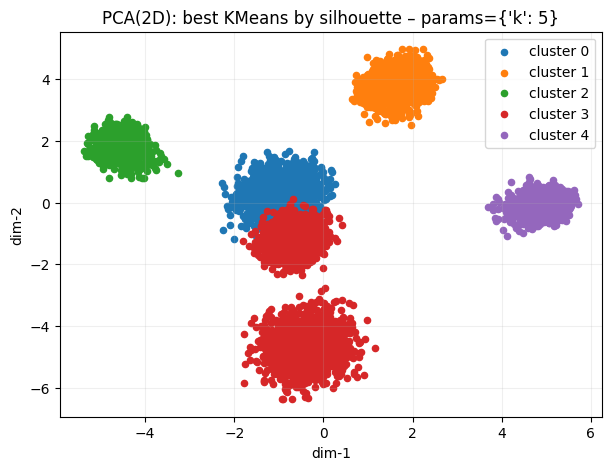

In [49]:
X_plot2d = pca_2d_for_plot(X4_processed, random_state=RANDOM_STATE)

plot_2d_embedding(
    X_plot2d, best_kmeans4["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans4['params']}",
    name_algo = "kmeans",
    n = 4
)

# DBSCAN best (if exists)
if best_dbscan4 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan4["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan4['params']} (noise=-1)",
        name_algo = "dbscan",
        n = 4
    )



In [50]:
X_plot2d

array([[-1.06538797,  0.08453897],
       [-0.31695844, -4.67698485],
       [ 2.19605863,  4.16469924],
       ...,
       [-4.66464687,  1.86438847],
       [ 5.08992379, -0.05131275],
       [ 4.98155523,  0.1919074 ]], shape=(10000, 2))

In [51]:
def external_metrics(y_true, labels):
    return {
        "ARI": float(adjusted_rand_score(y_true, labels)),
        "NMI": float(normalized_mutual_info_score(y_true, labels)),
    }

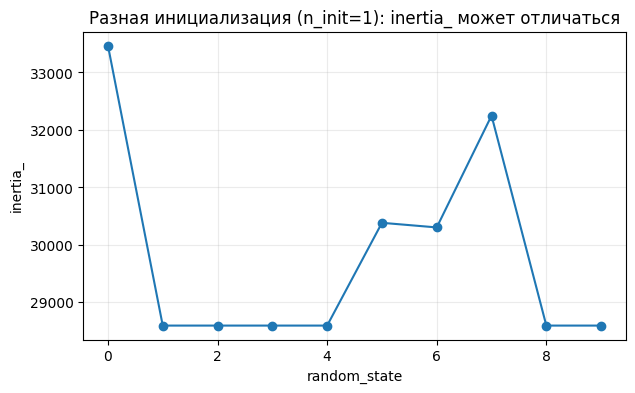

min inertia: 28591.33
max inertia: 33466.85
Средний попарный ARI: 1.000
Средний попарный NMI: 1.000


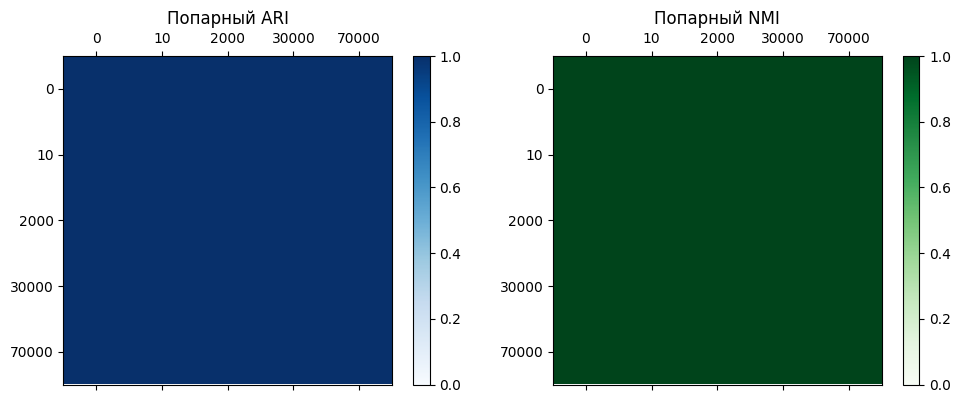

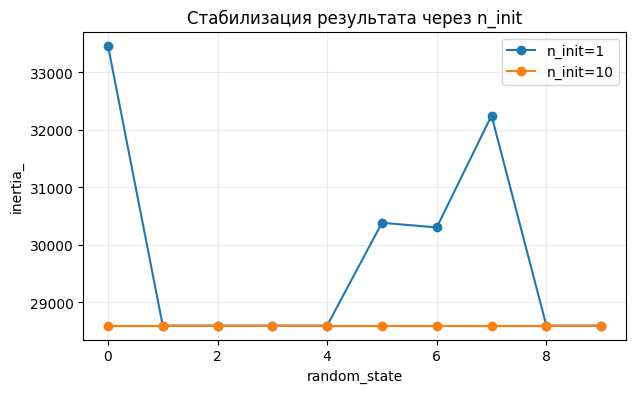

In [52]:
inertias = []
states = list(range(10))

for rs in states:
    m = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m.fit(X1_processed)
    inertias.append(m.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias, marker="o")
plt.title("Разная инициализация (n_init=1): inertia_ может отличаться")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.savefig(f"artifacts/figures/stability_before_dataset1.png", dpi=300)
plt.show()

print("min inertia:", round(float(np.min(inertias)), 2))
print("max inertia:", round(float(np.max(inertias)), 2))
print("=" * 72)



inertias_1 = []
inertias_10 = []
labels_list = []
RANDOM_STATES = [0, 10, 2000, 30000, 70000]
for rs in RANDOM_STATES:
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=rs)
    labels = kmeans.fit_predict(X1_processed)
    labels_list.append(labels)

# Считаем попарные ARI и NMI
ari_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))
nmi_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))

for i in range(len(labels_list)):
    for j in range(len(labels_list)):
        if i == j:
            ari_matrix[i, j] = 1.0
            nmi_matrix[i, j] = 1.0
        else:
            ari_matrix[i, j] = adjusted_rand_score(labels_list[i], labels_list[j])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_list[i], labels_list[j])


def mean_off_diagonal(mat):
    mask = ~np.eye(mat.shape[0], dtype=bool)
    return np.mean(mat[mask])

mean_ari = mean_off_diagonal(ari_matrix)
mean_nmi = mean_off_diagonal(nmi_matrix)

print(f"Средний попарный ARI: {mean_ari:.3f}")
print(f"Средний попарный NMI: {mean_nmi:.3f}")

# Опционально: визуализация матриц
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
im1 = axes[0].matshow(ari_matrix, vmin=0, vmax=1, cmap='Blues')
axes[0].set_title("Попарный ARI")
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].matshow(nmi_matrix, vmin=0, vmax=1, cmap='Greens')
axes[1].set_title("Попарный NMI")
plt.colorbar(im2, ax=axes[1])

for ax in axes:
    ax.set_xticks(range(len(RANDOM_STATES)))
    ax.set_yticks(range(len(RANDOM_STATES)))
    ax.set_xticklabels(RANDOM_STATES)
    ax.set_yticklabels(RANDOM_STATES)

plt.tight_layout()
plt.savefig("artifacts/figures/stability_ari_nmi_dataset1.png", dpi=300)
plt.show()

for rs in states:
    m1 = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m1.fit(X1_processed)
    inertias_1.append(m1.inertia_)

    m10 = KMeans(n_clusters=4, n_init=10, random_state=rs)
    m10.fit(X1_processed)
    inertias_10.append(m10.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias_1, marker="o", label="n_init=1")
plt.plot(states, inertias_10, marker="o", label="n_init=10")
plt.title("Стабилизация результата через n_init")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.legend()
plt.savefig(f"artifacts/figures/stability_after_dataset1.png", dpi=300)
plt.show()

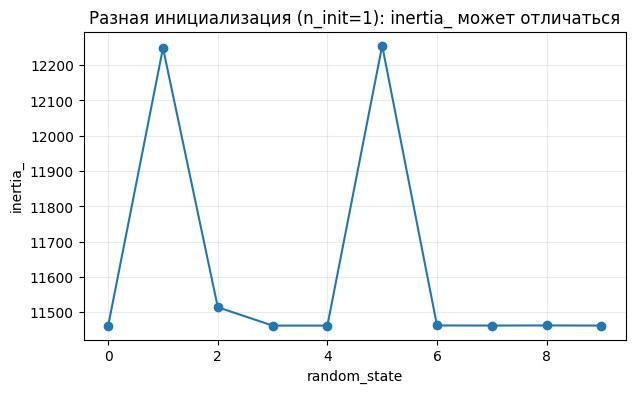

min inertia: 11462.17
max inertia: 12255.28
Средний попарный ARI: 0.972
Средний попарный NMI: 0.958


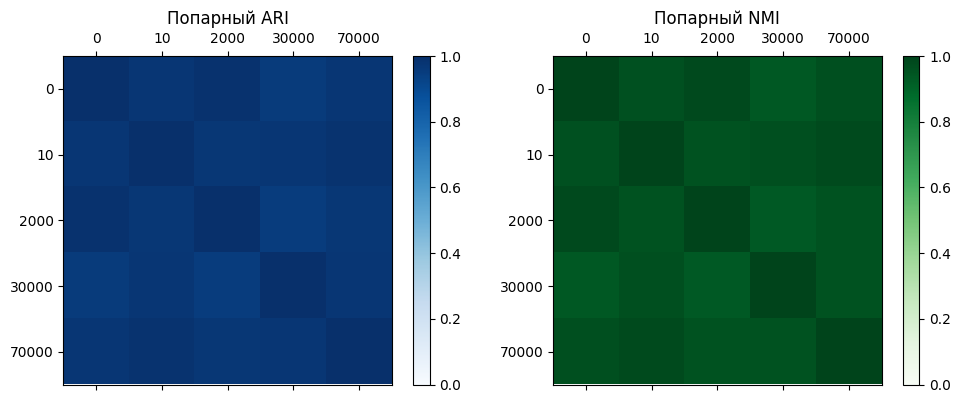

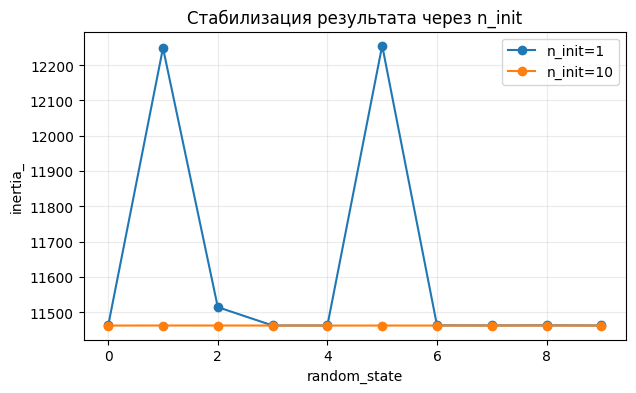

In [53]:
inertias = []
states = list(range(10))

for rs in states:
    m = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m.fit(X2_processed)
    inertias.append(m.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias, marker="o")
plt.title("Разная инициализация (n_init=1): inertia_ может отличаться")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.savefig(f"artifacts/figures/stability_before_dataset2.png", dpi=300)
plt.show()

print("min inertia:", round(float(np.min(inertias)), 2))
print("max inertia:", round(float(np.max(inertias)), 2))
print("=" * 72)



inertias_1 = []
inertias_10 = []
labels_list = []
RANDOM_STATES = [0, 10, 2000, 30000, 70000]
for rs in RANDOM_STATES:
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=rs)
    labels = kmeans.fit_predict(X2_processed)
    labels_list.append(labels)

# Считаем попарные ARI и NMI
ari_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))
nmi_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))

for i in range(len(labels_list)):
    for j in range(len(labels_list)):
        if i == j:
            ari_matrix[i, j] = 1.0
            nmi_matrix[i, j] = 1.0
        else:
            ari_matrix[i, j] = adjusted_rand_score(labels_list[i], labels_list[j])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_list[i], labels_list[j])


def mean_off_diagonal(mat):
    mask = ~np.eye(mat.shape[0], dtype=bool)
    return np.mean(mat[mask])

mean_ari = mean_off_diagonal(ari_matrix)
mean_nmi = mean_off_diagonal(nmi_matrix)

print(f"Средний попарный ARI: {mean_ari:.3f}")
print(f"Средний попарный NMI: {mean_nmi:.3f}")

# Опционально: визуализация матриц
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
im1 = axes[0].matshow(ari_matrix, vmin=0, vmax=1, cmap='Blues')
axes[0].set_title("Попарный ARI")
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].matshow(nmi_matrix, vmin=0, vmax=1, cmap='Greens')
axes[1].set_title("Попарный NMI")
plt.colorbar(im2, ax=axes[1])

for ax in axes:
    ax.set_xticks(range(len(RANDOM_STATES)))
    ax.set_yticks(range(len(RANDOM_STATES)))
    ax.set_xticklabels(RANDOM_STATES)
    ax.set_yticklabels(RANDOM_STATES)

plt.tight_layout()
plt.savefig("artifacts/figures/stability_ari_nmi_dataset2.png", dpi=300)
plt.show()

for rs in states:
    m1 = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m1.fit(X2_processed)
    inertias_1.append(m1.inertia_)

    m10 = KMeans(n_clusters=4, n_init=10, random_state=rs)
    m10.fit(X2_processed)
    inertias_10.append(m10.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias_1, marker="o", label="n_init=1")
plt.plot(states, inertias_10, marker="o", label="n_init=10")
plt.title("Стабилизация результата через n_init")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.legend()
plt.savefig(f"artifacts/figures/stability_after_dataset2.png", dpi=300)
plt.show()

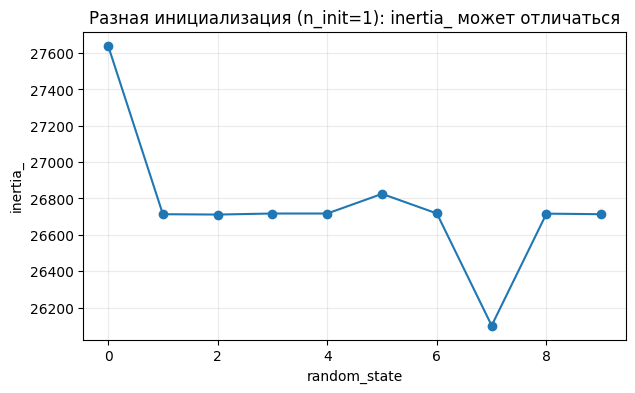

min inertia: 26100.57
max inertia: 27641.42
Средний попарный ARI: 1.000
Средний попарный NMI: 1.000


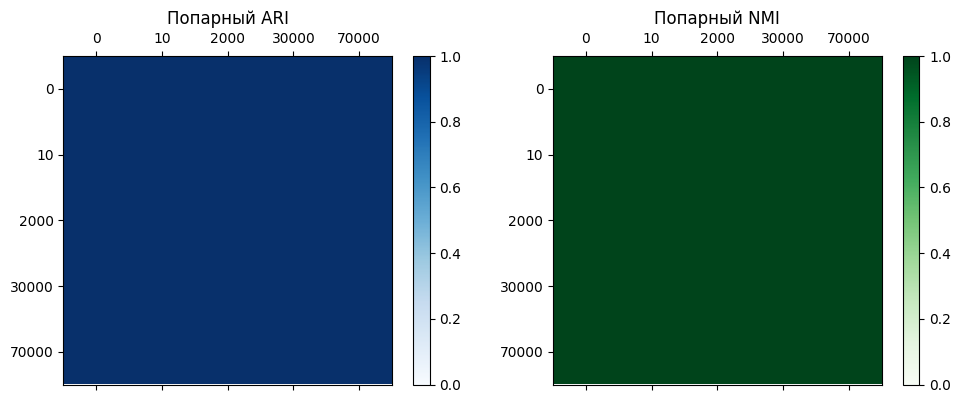

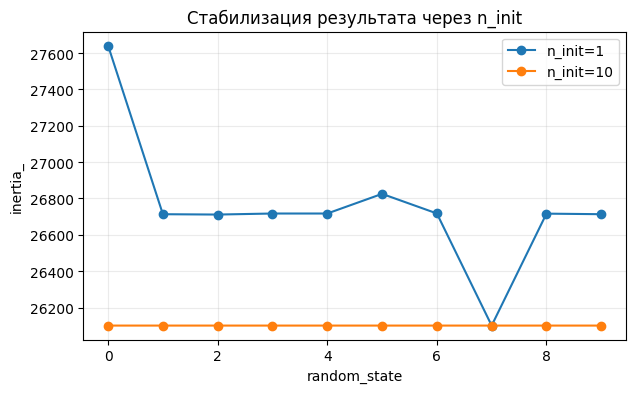

In [54]:
inertias = []
states = list(range(10))

for rs in states:
    m = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m.fit(X3_processed)
    inertias.append(m.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias, marker="o")
plt.title("Разная инициализация (n_init=1): inertia_ может отличаться")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.savefig(f"artifacts/figures/stability_before_dataset3.png", dpi=300)
plt.show()

print("min inertia:", round(float(np.min(inertias)), 2))
print("max inertia:", round(float(np.max(inertias)), 2))
print("=" * 72)



inertias_1 = []
inertias_10 = []
labels_list = []
RANDOM_STATES = [0, 10, 2000, 30000, 70000]
for rs in RANDOM_STATES:
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=rs)
    labels = kmeans.fit_predict(X3_processed)
    labels_list.append(labels)

# Считаем попарные ARI и NMI
ari_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))
nmi_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))

for i in range(len(labels_list)):
    for j in range(len(labels_list)):
        if i == j:
            ari_matrix[i, j] = 1.0
            nmi_matrix[i, j] = 1.0
        else:
            ari_matrix[i, j] = adjusted_rand_score(labels_list[i], labels_list[j])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_list[i], labels_list[j])


def mean_off_diagonal(mat):
    mask = ~np.eye(mat.shape[0], dtype=bool)
    return np.mean(mat[mask])

mean_ari = mean_off_diagonal(ari_matrix)
mean_nmi = mean_off_diagonal(nmi_matrix)

print(f"Средний попарный ARI: {mean_ari:.3f}")
print(f"Средний попарный NMI: {mean_nmi:.3f}")

# Опционально: визуализация матриц
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
im1 = axes[0].matshow(ari_matrix, vmin=0, vmax=1, cmap='Blues')
axes[0].set_title("Попарный ARI")
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].matshow(nmi_matrix, vmin=0, vmax=1, cmap='Greens')
axes[1].set_title("Попарный NMI")
plt.colorbar(im2, ax=axes[1])

for ax in axes:
    ax.set_xticks(range(len(RANDOM_STATES)))
    ax.set_yticks(range(len(RANDOM_STATES)))
    ax.set_xticklabels(RANDOM_STATES)
    ax.set_yticklabels(RANDOM_STATES)

plt.tight_layout()
plt.savefig("artifacts/figures/stability_ari_nmi_dataset3.png", dpi=300)
plt.show()

for rs in states:
    m1 = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m1.fit(X3_processed)
    inertias_1.append(m1.inertia_)

    m10 = KMeans(n_clusters=4, n_init=10, random_state=rs)
    m10.fit(X3_processed)
    inertias_10.append(m10.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias_1, marker="o", label="n_init=1")
plt.plot(states, inertias_10, marker="o", label="n_init=10")
plt.title("Стабилизация результата через n_init")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.legend()
plt.savefig(f"artifacts/figures/stability_after_dataset3.png", dpi=300)
plt.show()

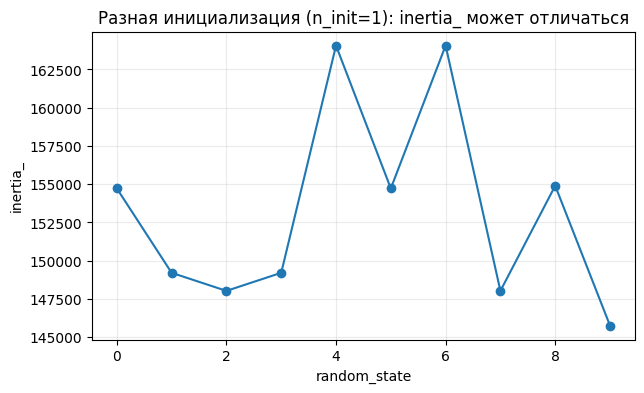

min inertia: 145756.15
max inertia: 164063.34
Средний попарный ARI: 0.889
Средний попарный NMI: 0.930


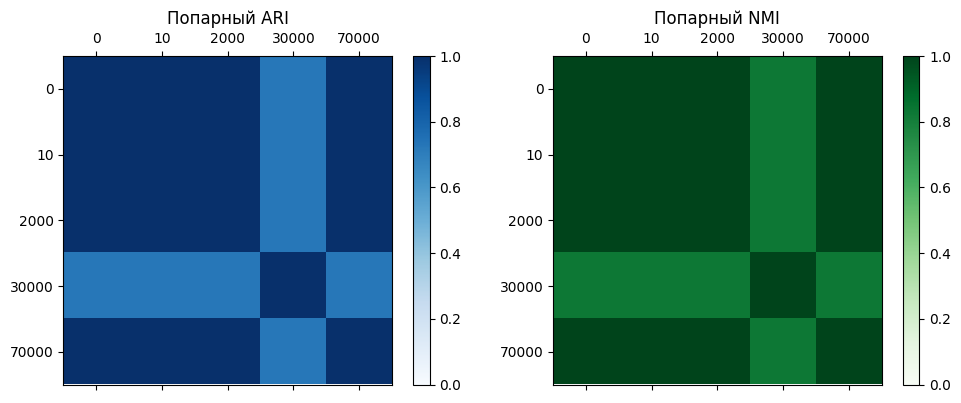

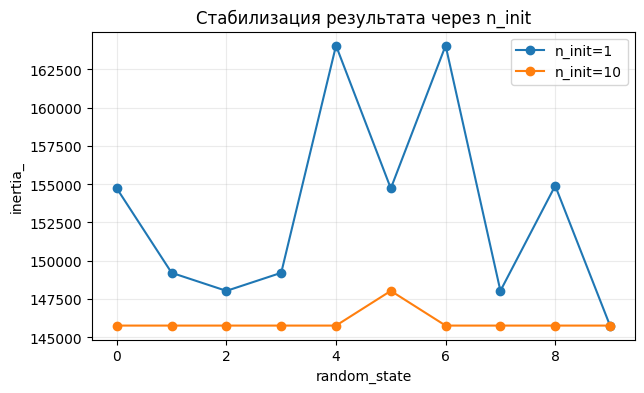

In [55]:
inertias = []
states = list(range(10))

for rs in states:
    m = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m.fit(X4_processed)
    inertias.append(m.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias, marker="o")
plt.title("Разная инициализация (n_init=1): inertia_ может отличаться")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.savefig(f"artifacts/figures/stability_before_dataset4.png", dpi=300)
plt.show()

print("min inertia:", round(float(np.min(inertias)), 2))
print("max inertia:", round(float(np.max(inertias)), 2))
print("=" * 72)



inertias_1 = []
inertias_10 = []
labels_list = []
RANDOM_STATES = [0, 10, 2000, 30000, 70000]
for rs in RANDOM_STATES:
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=rs)
    labels = kmeans.fit_predict(X4_processed)
    labels_list.append(labels)

# Считаем попарные ARI и NMI
ari_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))
nmi_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))

for i in range(len(labels_list)):
    for j in range(len(labels_list)):
        if i == j:
            ari_matrix[i, j] = 1.0
            nmi_matrix[i, j] = 1.0
        else:
            ari_matrix[i, j] = adjusted_rand_score(labels_list[i], labels_list[j])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_list[i], labels_list[j])


def mean_off_diagonal(mat):
    mask = ~np.eye(mat.shape[0], dtype=bool)
    return np.mean(mat[mask])

mean_ari = mean_off_diagonal(ari_matrix)
mean_nmi = mean_off_diagonal(nmi_matrix)

print(f"Средний попарный ARI: {mean_ari:.3f}")
print(f"Средний попарный NMI: {mean_nmi:.3f}")

# Опционально: визуализация матриц
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
im1 = axes[0].matshow(ari_matrix, vmin=0, vmax=1, cmap='Blues')
axes[0].set_title("Попарный ARI")
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].matshow(nmi_matrix, vmin=0, vmax=1, cmap='Greens')
axes[1].set_title("Попарный NMI")
plt.colorbar(im2, ax=axes[1])

for ax in axes:
    ax.set_xticks(range(len(RANDOM_STATES)))
    ax.set_yticks(range(len(RANDOM_STATES)))
    ax.set_xticklabels(RANDOM_STATES)
    ax.set_yticklabels(RANDOM_STATES)

plt.tight_layout()
plt.savefig("artifacts/figures/stability_ari_nmi_dataset4.png", dpi=300)
plt.show()

for rs in states:
    m1 = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m1.fit(X4_processed)
    inertias_1.append(m1.inertia_)

    m10 = KMeans(n_clusters=4, n_init=10, random_state=rs)
    m10.fit(X4_processed)
    inertias_10.append(m10.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias_1, marker="o", label="n_init=1")
plt.plot(states, inertias_10, marker="o", label="n_init=10")
plt.title("Стабилизация результата через n_init")
plt.xlabel("random_state")
plt.ylabel("inertia_")
plt.grid(True, alpha=0.25)
plt.legend()
plt.savefig(f"artifacts/figures/stability_after_dataset4.png", dpi=300)
plt.show()

In [56]:
def save_json(obj: dict, path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open("w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)

metrics_summary = {
    "S07-hw-dataset-01": {
        "algo": {
            "Kmeans": {
                "params": 6,
                "n_clusters:": 6,
                "metrics": {
                    "silhouette_score": 0.359,
                    "davies_bouldin_score": 1.182,
                    "calinski_harabasz_score": 7333.4,
                    "inertia": 23662.2
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 0.6,
                    "min_samples": 10,
                },
                "n_clusters:": 5,
                "noise_frac": 0.019,
                "non-noise": 11770,
                "metrics": {
                    "silhouette_score": 0.385,
                    "davies_bouldin_score": 1.24,
                    "calinski_harabasz_score": 8561.5,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 4,
                    "linkage": "ward",
                },
                "n_clusters:": 4,
                "metrics": {
                    "silhouette_score": 0.383,
                    "davies_bouldin_score": 1.16,
                    "calinski_harabasz_score": 9425.8,
                }
             }
        }
    },
    "S07-hw-dataset-02": {
       "algo": {
            "Kmeans": {
                "params": 16,
                "n_clusters:": 16,
                "metrics": {
                    "silhouette_score": 0.284,
                    "davies_bouldin_score": 0.956,
                    "calinski_harabasz_score": 2329.4,
                    "inertia": 4463.9
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 0.21,
                    "min_samples": 10,
                },
                "n_clusters:": 5,
                "noise_frac": 0.136,
                "non-noise": 6914,
                "metrics": {
                    "silhouette_score": 0.097,
                    "davies_bouldin_score": 0.962,
                    "calinski_harabasz_score": 766.7,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 13,
                    "linkage": "ward",
                },
                "n_clusters:": 13,
                "metrics": {
                    "silhouette_score": 0.21,
                    "davies_bouldin_score": 1.172,
                    "calinski_harabasz_score": 1802.9,
                }
             }
        } 
    },
    "S07-hw-dataset-03": {
        "algo": {
            "Kmeans": {
                "params": 5,
                "n_clusters:": 5,
                "metrics": {
                    "silhouette_score": 0.299,
                    "davies_bouldin_score": 1.169,
                    "calinski_harabasz_score": 6125.1,
                    "inertia": 22779.9
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 0.4,
                    "min_samples": 10,
                },
                "n_clusters:": 4,
                "noise_frac": 0.075,
                "non-noise": 13871,
                "metrics": {
                    "silhouette_score": 0.12,
                    "davies_bouldin_score": 1.02,
                    "calinski_harabasz_score": 2125.7,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 4,
                    "linkage": "ward",
                },
                "n_clusters:": 4,
                "metrics": {
                    "silhouette_score": 0.304,
                    "davies_bouldin_score": 1.173,
                    "calinski_harabasz_score": 6206.4,
                }
             }
        }
    },
    "S07-hw-dataset-04": {
         "algo": {
            "Kmeans": {
                "params": 5,
                "n_clusters:": 5,
                "metrics": {
                    "silhouette_score": 0.447,
                    "davies_bouldin_score": 0.976,
                    "calinski_harabasz_score": 5087.7,
                    "inertia": 104300.6
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 2.0,
                    "min_samples": 10,
                },
                "n_clusters:": 6,
                "noise_frac": 0.488,
                "non-noise": 5115,
                "metrics": {
                    "silhouette_score": 0.507,
                    "davies_bouldin_score": 0.824,
                    "calinski_harabasz_score": 3916.5,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 5,
                    "linkage": "ward",
                },
                "n_clusters:": 5,
                "metrics": {
                    "silhouette_score": 0.447,
                    "davies_bouldin_score": 0.976,
                    "calinski_harabasz_score": 5087.7,
                }
             }
        }
    },
    "random_state": RANDOM_STATE,
}

best_configs = {
    "S07-hw-dataset-01": {
        "DBSCAN": {
                "params": {
                    "eps": 0.6,
                    "min_samples": 10,
                },
            },
    },
    "S07-hw-dataset-02": {
            "Kmeans": {
                "k": 16,
            },
    },
    "S07-hw-dataset-03": {
        "Agglomerative": {
                "params": {
                    "k": 4,
                    "linkage": "ward",
                },
             }
    },
    "S07-hw-dataset-04": {
        "DBSCAN": {
                "params": {
                    "eps": 2.0,
                    "min_samples": 10,
                },
            },
    },
    "random_state": RANDOM_STATE,
}

save_json(metrics_summary, ARTIFACTS_DIR / "metrics_summary.json")
save_json(best_configs, ARTIFACTS_DIR / "best_configs.json")

print("Saved:", ARTIFACTS_DIR / "metrics_summar.json")
print("Saved:", ARTIFACTS_DIR / "best_configs.json")

Saved: artifacts\metrics_summar.json
Saved: artifacts\best_configs.json
